Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

K-Means and Hierarchical Clustering are both unsupervised clustering methods, but they differ mainly in how they form clusters, whether they need the number of clusters in advance, scalability, and the kind of structure they reveal in data. Each is better suited to different data sizes and analytical goals.

Core differences

- Cluster formation method

K-Means is a partitioning algorithm: it directly splits the dataset into
K
K flat clusters by iteratively assigning points to the nearest centroid and updating those centroids.
​

Hierarchical clustering builds a tree-like hierarchy of clusters (dendrogram), either bottom-up (agglomerative: start with each point as its own cluster and merge) or top-down (divisive: start with one cluster and split).
​

- Need to specify K

- K-Means requires you to predefine the number of clusters
K
K.
​

- Hierarchical clustering does not require a fixed
K
K upfront; you can inspect the dendrogram and “cut” it at different levels to choose
K
K.
​

- Scalability and complexity

K-Means is computationally efficient and scales well to large datasets (thousands to millions of points).
​

- Hierarchical clustering is more computationally expensive (often
O
(
n
2
)
O(n
2
 ) or worse), so it is typically used for small to medium datasets.
​

- Cluster shape and assumptions

- K-Means works best when clusters are roughly spherical/convex and of similar size, because it optimizes around centroids.
​

- Hierarchical clustering can adapt to clusters of varying shapes and sizes, depending on the linkage method (single, complete, average, etc.).
​

- Output and interpretability

- K-Means outputs only a flat assignment of each point to one cluster and the final centroids (no hierarchy).
​

- Hierarchical clustering outputs a dendrogram that reveals nested relationships between groups, which is often more interpretable for exploratory analysis.


Typical hierarchical clustering use case
- A common use case is gene expression or document similarity analysis with a smaller number of items where understanding relationships matters more than raw scalability.

- In bioinformatics, hierarchical clustering of a few hundred genes (or samples) based on expression profiles helps visualize which genes cluster together and at what similarity level, using the dendrogram to infer biological groupings.
​

Similarly, in text analytics with a moderate number of documents, hierarchical clustering can reveal topic groupings and subgroups, and analysts can choose the number of clusters by “cutting” the dendrogram at different heights.


Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

The Silhouette Score evaluates clustering quality by measuring how well each data point fits its assigned cluster compared to others. It ranges from -1 (poor clustering) to +1 (excellent), with values above 0.5 indicating strong cohesion and separation.

Purpose in Evaluation

It helps select the optimal number of clusters (e.g., via elbow plots) and compare algorithms like K-Means vs. Hierarchical without ground truth labels. Average scores across all points summarize overall performance.


Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

DBSCAN relies on two core parameters: eps (ε) and min_samples (MinPts), which define density-based clusters without needing a predefined number of clusters.
​

Parameter Effects
- eps (ε): Maximum distance for points to be neighbors. Small ε creates tight clusters but more noise; large ε merges clusters or misses separation.
​

- min_samples (MinPts): Minimum points (including itself) in ε-neighborhood to form a core point. Higher values detect denser clusters; lower values allow sparser ones, increasing noise risk.
​

These enable DBSCAN to identify arbitrary shapes, outliers as noise, and core/border points dynamically.
​



Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Feature scaling ensures all features contribute equally to distance calculations in clustering algorithms like K-Means and DBSCAN, preventing features with larger ranges from dominating.
​

Why for K-Means

K-Means relies on Euclidean distances to centroids; unscaled features (e.g., age in years vs. income in thousands) bias clusters toward high-magnitude variables, distorting partitions.
​

Why for DBSCAN

DBSCAN uses neighborhood distances (eps parameter); scaling avoids uneven density definitions across features, enabling fair detection of clusters and noise.
​

Common Methods
- Standardization (Z-score): Mean 0, std 1—ideal for Gaussian-like data.
​

- Min-Max: range—preserves relationships for bounded data.


Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

The Elbow Method is a heuristic approach used to determine the optimal number of clusters (k) for K-Means clustering.

Here's how it works:

- Calculate WCSS for different k values: You run the K-Means algorithm for a range of k values (e.g., from 1 to 10). For each k, you calculate the Within-Cluster Sum of Squares (WCSS). WCSS is the sum of the squared distances between each point and the centroid of its assigned cluster. It essentially measures the compactness of the clusters.

- Plot WCSS against k: You then plot the calculated WCSS values on the y-axis against the number of clusters (k) on the x-axis.

- Identify the 'elbow' point: As you increase the number of clusters (k), the WCSS will generally decrease because adding more clusters means the data points are closer to their respective centroids. However, the rate of decrease in WCSS often changes significantly at a certain point. This point looks like an 'elbow' on the plot. The idea is that beyond this elbow point, adding more clusters does not significantly reduce the WCSS, meaning the additional clusters don't provide much better partitioning of the data.

How it helps determine the optimal number of clusters:

The 'elbow' point on the plot is considered to be the optimal number of clusters. Before the elbow, increasing k dramatically reduces WCSS, suggesting that each additional cluster is explaining a lot of the variance in the data. After the elbow, the WCSS decreases much more slowly, implying that adding more clusters provides diminishing returns in terms of explaining data variance and might lead to overfitting or creating trivial clusters. The elbow represents a good balance between minimizing WCSS and keeping the number of clusters manageable and interpretable.

Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.


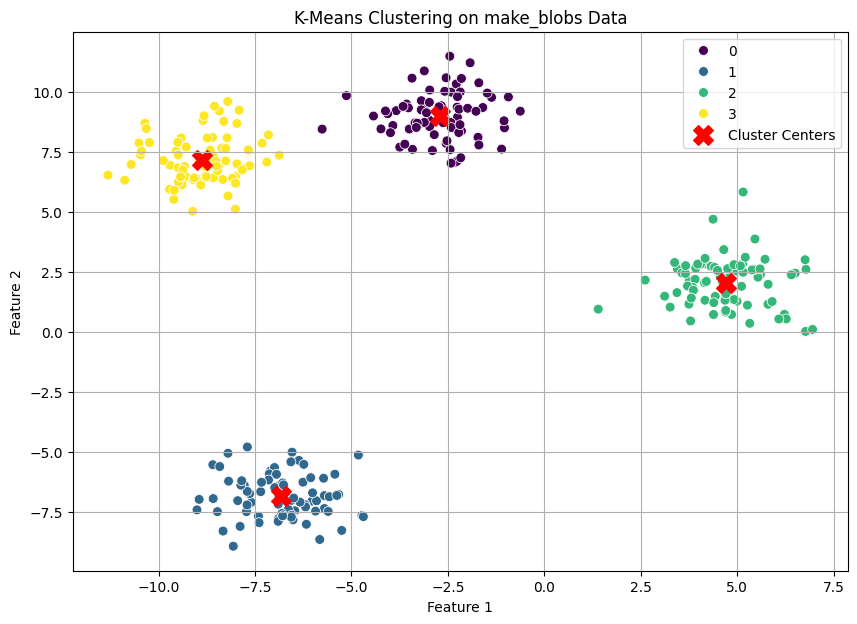

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data using make_blobs
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, random_state=42)

# 2. Apply KMeans clustering
# We know there are 4 centers from make_blobs, so we set n_clusters=4
kmeans_blobs = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_blobs.fit(X_blobs)

# Get cluster labels and centroids
labels_blobs = kmeans_blobs.labels_
centers_blobs = kmeans_blobs.cluster_centers_

# 3. Visualize the results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_blobs[:, 0], y=X_blobs[:, 1], hue=labels_blobs, palette='viridis', s=50, legend='full')
plt.scatter(centers_blobs[:, 0], centers_blobs[:, 1], marker='X', s=200, color='red', label='Cluster Centers')
plt.title('K-Means Clustering on make_blobs Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).



In [2]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print("Wine dataset loaded. Shape of features (X):", X_wine.shape)

Wine dataset loaded. Shape of features (X): (178, 13)


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Load the Wine dataset if X_wine is not defined (to ensure independent execution of this cell)
# In a typical workflow, you would ensure the cell loading X_wine runs first.
try:
    _ = X_wine
except NameError:
    wine = load_wine()
    X_wine = wine.data

# Apply StandardScaler to the features
schler = StandardScaler()
X_scaled_wine = schler.fit_transform(X_wine)

print("Features scaled using StandardScaler. Shape of scaled data:", X_scaled_wine.shape)

Features scaled using StandardScaler. Shape of scaled data: (178, 13)


In [5]:
from sklearn.cluster import DBSCAN
import numpy as np

# Train a DBSCAN model
# Epsilon (eps) and minimum samples (min_samples) are crucial parameters for DBSCAN.
# These values often require tuning based on the dataset's density and structure.
# For the Wine dataset, common choices are around eps=0.5 to 1.0 and min_samples=5 to 10.
# Let's start with common default-like values and observe.
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit(X_scaled_wine)

# Get the cluster labels
labels_dbscan = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
# Noise points are labeled as -1.
n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

print(f"Number of clusters found by DBSCAN (excluding noise): {n_clusters_}")
print(f"Number of noise points (labeled -1): {list(labels_dbscan).count(-1)}")

Number of clusters found by DBSCAN (excluding noise): 0
Number of noise points (labeled -1): 178


Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.


Number of clusters found by DBSCAN on make_moons data: 1
Number of noise points (outliers): 0


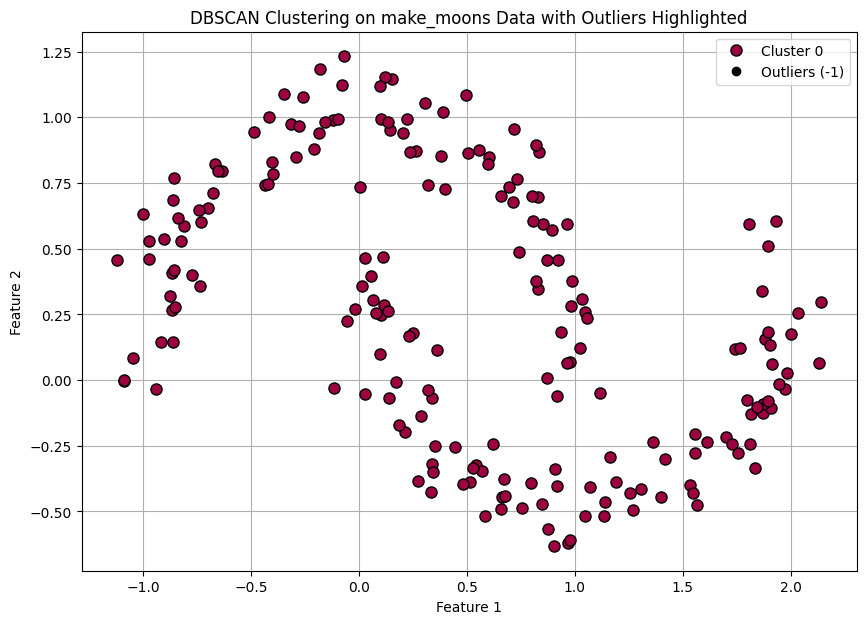

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate moon-shaped synthetic data
X_moons, y_moons = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. Apply DBSCAN
# For moon-shaped data, we'll need to tune eps and min_samples.
# A common strategy is to use k-distance graphs or simply experiment.
# Let's try some values that often work for this dataset shape.
dbscan_moons = DBSCAN(eps=0.3, min_samples=5) # These parameters are often suitable for make_moons with noise=0.1
dbscan_moons.fit(X_moons)

# Get cluster labels
labels_moons = dbscan_moons.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_moons = len(set(labels_moons)) - (1 if -1 in labels_moons else 0)
n_noise_moons = list(labels_moons).count(-1)

print(f"Number of clusters found by DBSCAN on make_moons data: {n_clusters_moons}")
print(f"Number of noise points (outliers): {n_noise_moons}")

# 3. Visualize the results, highlighting outliers
plt.figure(figsize=(10, 7))

# Plot normal points (not outliers)
core_samples_mask = np.zeros_like(labels_moons, dtype=bool)
core_samples_mask[dbscan_moons.core_sample_indices_] = True

# Separate outliers from clustered points
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters_moons + (1 if -1 in labels_moons else 0)))

for k, col in zip(range(n_clusters_moons), colors):
    class_member_mask = (labels_moons == k)
    xy = X_moons[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=8, label=f'Cluster {k}')

# Plot outliers
noise_mask = (labels_moons == -1)
xy_noise = X_moons[noise_mask]
plt.plot(xy_noise[:, 0], xy_noise[:, 1], 'o', markerfacecolor='black', markeredgecolor='k', markersize=6, label='Outliers (-1)')

plt.title('DBSCAN Clustering on make_moons Data with Outliers Highlighted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

Load the Wine dataset, apply PCA to reduce it to 2 dimensions using X_scaled_wine, perform Agglomerative Clustering on the PCA-transformed data, visualize the clustering results with a 2D scatter plot and a legend, and provide insights into the clustering.

Load Wine Dataset
Subtask:
Load the Wine dataset using sklearn.datasets.load_wine().

Apply PCA for Dimensionality Reduction
Subtask:
Apply Principal Component Analysis (PCA) to reduce the Wine dataset to 2 dimensions for visualization purposes.

Reasoning: To reduce the dimensionality of the Wine dataset to 2 dimensions for visualization, I will apply PCA. This involves importing the PCA class, instantiating it with 2 components, fitting it to the scaled wine data, and then transforming the data.

In [7]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the scaled Wine dataset and transform it
X_pca_wine = pca.fit_transform(X_scaled_wine)

print("Original Wine dataset shape (scaled):", X_scaled_wine.shape)
print("Reduced Wine dataset shape (PCA):", X_pca_wine.shape)

Original Wine dataset shape (scaled): (178, 13)
Reduced Wine dataset shape (PCA): (178, 2)


Apply Agglomerative Clustering
Subtask:
Perform Agglomerative Clustering on the 2-dimensional PCA-transformed data.

Reasoning: To perform Agglomerative Clustering, I need to import the AgglomerativeClustering class, instantiate it with the specified parameters, and then fit it to the PCA-transformed data.

In [8]:
from sklearn.cluster import AgglomerativeClustering

# Instantiate AgglomerativeClustering with n_clusters=3 and linkage='ward'
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model to the PCA-transformed data and get the cluster labels
labels_agglo = agglo.fit_predict(X_pca_wine)

print("Agglomerative Clustering applied. Cluster labels stored in 'labels_agglo'.")
print("First 10 cluster labels:", labels_agglo[:10])

Agglomerative Clustering applied. Cluster labels stored in 'labels_agglo'.
First 10 cluster labels: [2 2 2 2 2 2 2 2 2 2]


Visualize Clustering Results
Subtask:
Create a 2D scatter plot of the PCA-transformed data, coloring the points according to their assigned clusters from Agglomerative Clustering. Ensure to add a legend.

Reasoning: To visualize the Agglomerative Clustering results on the PCA-transformed data, I will create a 2D scatter plot, coloring the points by their cluster assignments and adding appropriate labels and a legend.



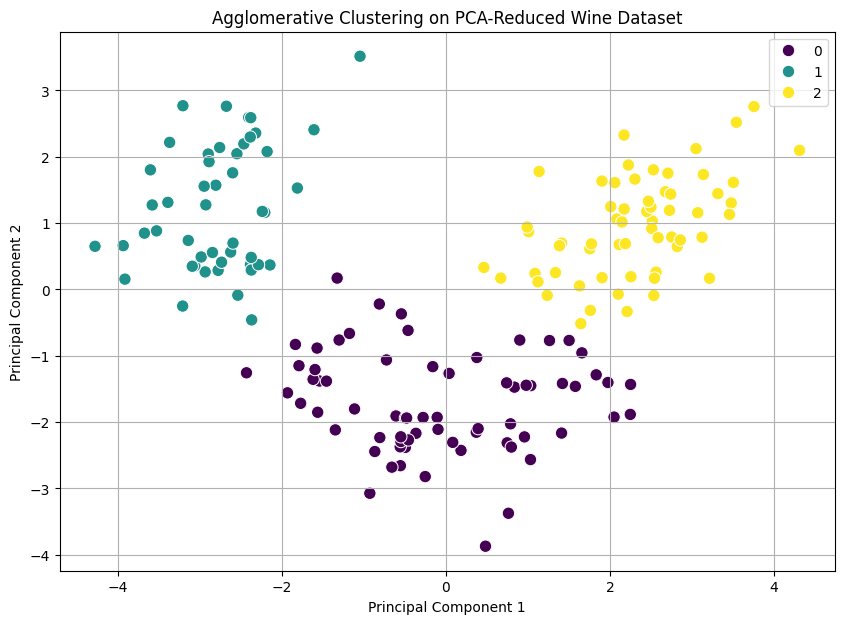

Scatter plot showing Agglomerative Clustering results on PCA-transformed data.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_wine[:, 0], y=X_pca_wine[:, 1], hue=labels_agglo, palette='viridis', s=80, legend='full')
plt.title('Agglomerative Clustering on PCA-Reduced Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
print("Scatter plot showing Agglomerative Clustering results on PCA-transformed data.")

Final Task
Subtask:
Review the generated plot and provide insights into the Agglomerative Clustering results on the Wine dataset after PCA dimensionality reduction.

Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?

Task

Describe the data science workflow for customer segmentation, covering algorithm selection, data preprocessing, determination of the number of clusters, and the benefits for the marketing team. Finally, summarize the proposed customer segmentation workflow and its advantages.

Describe Data Science Workflow for Customer Segmentation

Subtask:

Provide a detailed explanation of the data science workflow for customer segmentation, covering algorithm selection, data preprocessing, determination of the number of clusters, and the benefits for the marketing team.

1. Data Preprocessing

Data preprocessing is a crucial step in customer segmentation to ensure the data is clean, consistent, and in a suitable format for clustering algorithms.

This typically involves:

- Handling Missing Values: Missing data can skew results and lead to inaccurate clusters. Strategies include imputation (e.g., mean, median, mode, or more advanced methods like K-Nearest Neighbors imputation) or removal of rows/columns with excessive missing data, depending on the dataset and the proportion of missing values.

- Encoding Categorical Variables: Clustering algorithms primarily work with numerical data. Categorical features (e.g., 'gender', 'city', 'product category') need to be converted into numerical representations. Common techniques include One-Hot Encoding (for nominal categories) and Label Encoding (for ordinal categories). Care must be taken with one-hot encoding to avoid creating too many dimensions.

- Feature Scaling: Most clustering algorithms, especially distance-based ones like K-Means and Agglomerative Clustering, are sensitive to the scale of features. Features with larger numerical ranges can disproportionately influence distance calculations.

Scaling techniques like Standardization (Z-score normalization, where data is scaled to have a mean of 0 and a standard deviation of 1) or Normalization (Min-Max scaling, where data is scaled to a range between 0 and 1) are applied to ensure all features contribute equally to the distance metric.

- Feature Engineering: This involves creating new features from existing ones that might provide more meaningful insights or better distinguish customer segments. Examples include calculating 'recency', 'frequency', and 'monetary' (RFM) values from transaction data, deriving 'average order value', or creating 'customer lifetime value' (CLV) estimates. Effective feature engineering can significantly improve the quality of the segmentation.


2. Algorithm Selection

Choosing the right clustering algorithm is critical for effective customer segmentation, as different algorithms are suited for different data structures and objectives. Here are some common choices:

- K-Means: This is a centroid-based clustering algorithm that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (centroid).

- Suitability: K-Means is efficient and works well with spherical, equally sized clusters. It's often a good starting point for its simplicity and interpretability.

- Limitations: It requires the number of clusters (k) to be specified beforehand, can struggle with non-globular or irregularly shaped clusters, and is sensitive to outliers.

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise): This algorithm groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions.

Suitability: DBSCAN is excellent for discovering clusters of arbitrary shape and can identify noise (outliers). It doesn't require the number of clusters to be specified in advance.

- Limitations: It can be sensitive to parameter settings (eps and min_samples) and struggles with clusters of varying densities.

- Agglomerative Clustering (Hierarchical Clustering): This algorithm builds a hierarchy of clusters. It starts with each data point as a single cluster and then iteratively merges the closest pairs of clusters until all points are in a single cluster or a stopping criterion is met.

- Suitability: Agglomerative clustering produces a dendrogram, which can be useful for visualizing the hierarchical relationships between clusters and for determining the optimal number of clusters. It doesn't require k upfront.

- Limitations: It can be computationally expensive for large datasets, and decisions made early in the merging process cannot be undone, which might lead to suboptimal clusters.

3. Determining the Optimal Number of Clusters
One of the most challenging aspects of clustering is determining the optimal number of clusters (k). While some algorithms (like DBSCAN) don't require k upfront, others (like K-Means and Agglomerative Clustering when cutting a dendrogram) do. Several methods can help in making an informed decision:

- Elbow Method: This method looks at the total within-cluster sum of squares (WCSS) as a function of the number of clusters (k). WCSS decreases as k increases (because each cluster will have fewer points, and thus smaller variance). The "elbow" point on the plot, where the rate of decrease sharply changes, is often considered the optimal k. It represents a good trade-off between minimizing WCSS and keeping k small.

- Silhouette Score: The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where:

A score near +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

A score near 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.

A score near -1 indicates that the object might have been assigned to the wrong cluster. The optimal k is often associated with the highest average Silhouette Score.

- Gap Statistic: The Gap Statistic compares the total within-cluster variation for different values of k with that expected under a null reference distribution (i.e., a dataset with no obvious clustering). The optimal k is the value for which the Gap Statistic is maximized, indicating the largest deviation from a random distribution. This method tends to be more robust than the Elbow method for certain datasets.

4. Benefits for the Marketing Team

- Customer segmentation offers significant advantages for marketing teams, enabling them to move beyond a one-size-fits-all approach to a more targeted and effective strategy. Key benefits include:

- Personalized Marketing Campaigns: By understanding the unique characteristics, preferences, and behaviors of different customer segments, marketing teams can craft highly personalized messages and campaigns. This leads to higher engagement rates, better conversion rates, and increased customer loyalty because customers receive offers and communications that are relevant to their specific needs and interests.

- Improved Product Development: Segmentation provides insights into what different customer groups value, their unmet needs, and their pain points. This information is invaluable for guiding product development and innovation, ensuring that new products or features are designed to appeal to specific, profitable segments. It helps in allocating resources efficiently towards features that matter most to target customers.

- Better Resource Allocation: Marketing budgets and resources are often limited. Segmentation allows teams to strategically allocate these resources to the most valuable segments or those with the highest growth potential. For instance, high-value segments might receive more intensive, personalized attention, while other segments might be targeted with more cost-effective broad campaigns. This optimizes ROI for marketing efforts.

- Enhanced Customer Satisfaction and Retention: When customers feel understood and their needs are met through tailored products and communications, their satisfaction levels increase. This leads to stronger customer relationships, reduced churn rates, and improved customer lifetime value (CLV). Personalized experiences foster a sense of loyalty and make customers feel valued.

- Competitive Advantage: Companies that effectively segment their customers and tailor their strategies can gain a significant competitive edge. They can respond more quickly to market changes, identify niche opportunities, and defend against competitors by offering superior, segment-specific value propositions.

4. Benefits for the Marketing Team

- Customer segmentation offers significant advantages for marketing teams, enabling them to move beyond a one-size-fits-all approach to a more targeted and effective strategy.

Key benefits include:

- Personalized Marketing Campaigns: By understanding the unique characteristics, preferences, and behaviors of different customer segments, marketing teams can craft highly personalized messages and campaigns. This leads to higher engagement rates, better conversion rates, and increased customer loyalty because customers receive offers and communications that are relevant to their specific needs and interests.

- Improved Product Development: Segmentation provides insights into what different customer groups value, their unmet needs, and their pain points. This information is invaluable for guiding product development and innovation, ensuring that new products or features are designed to appeal to specific, profitable segments. It helps in allocating resources efficiently towards features that matter most to target customers.

- Better Resource Allocation: Marketing budgets and resources are often limited. Segmentation allows teams to strategically allocate these resources to the most valuable segments or those with the highest growth potential. For instance, high-value segments might receive more intensive, personalized attention, while other segments might be targeted with more cost-effective broad campaigns. This optimizes ROI for marketing efforts.

- Enhanced Customer Satisfaction and Retention: When customers feel understood and their needs are met through tailored products and communications, their satisfaction levels increase. This leads to stronger customer relationships, reduced churn rates, and improved customer lifetime value (CLV). Personalized experiences foster a sense of loyalty and make customers feel valued.

- Competitive Advantage: Companies that effectively segment their customers and tailor their strategies can gain a significant competitive edge. They can respond more quickly to market changes, identify niche opportunities, and defend against competitors by offering superior, segment-specific value propositions.

Final Task

Subtask:

Summarize the proposed customer segmentation workflow and its advantages.

Summary:

Q&A

What is the proposed customer segmentation workflow? The proposed customer segmentation workflow involves a four-stage process: Data Preprocessing, Algorithm Selection, Determining the Optimal Number of Clusters, and leveraging the Benefits for the Marketing Team.

What are the advantages of this customer segmentation workflow?

The advantages include enabling personalized marketing campaigns, guiding improved product development, facilitating better resource allocation, enhancing customer satisfaction and retention, and ultimately providing a competitive advantage.

Data Analysis Key Findings

- Data Preprocessing: Essential steps include handling missing values (imputation or removal), encoding categorical variables (One-Hot or Label Encoding), feature scaling (Standardization or Normalization) for algorithms sensitive to scale, and feature engineering (e.g., RFM values) to create more meaningful insights.

- Algorithm Selection: Common clustering algorithms discussed are K-Means (efficient for spherical clusters, requires k), DBSCAN (finds arbitrary shapes, identifies noise, no k required), and Agglomerative Clustering (hierarchical, useful dendrograms, computationally intensive for large datasets).

- Optimal Cluster Number Determination: Methods for finding the ideal number of clusters (k) include the Elbow Method (looking for the "elbow" point in WCSS vs. k plot), Silhouette Score (measures cohesion and separation, score near +1 is best), and Gap Statistic (compares within-cluster variation to a reference distribution).

- Marketing Benefits: Customer segmentation provides significant benefits to marketing teams, including the ability to create personalized marketing campaigns, inform improved product development, enable better resource allocation, enhance customer satisfaction and retention, and gain a competitive advantage in the market.

Insights or Next Steps

- To ensure the highest quality segmentation, it is crucial to perform thorough data validation and iterative refinement of preprocessing steps and algorithm parameters, as these choices significantly impact the resulting clusters.

- After segmentation, further analysis and profiling of each identified customer segment would be beneficial to deeply understand their characteristics, behaviors, and needs, translating these insights into actionable marketing strategies and product initiatives.
